# <center><h1 style="font-family: Times New Roman; color: black;">K-Nearest Neighbours</h1></center>

# Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

# Dataset:
Need to Classify the animal type

# Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

# Solutions: 

# 1. Analyzing the Data with Visualizations

In [2]:
# Import Libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('Zoo.csv')

# Display the first few rows of the dataset
data.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

# 1.1 Visualize the Distribution of Animal Types

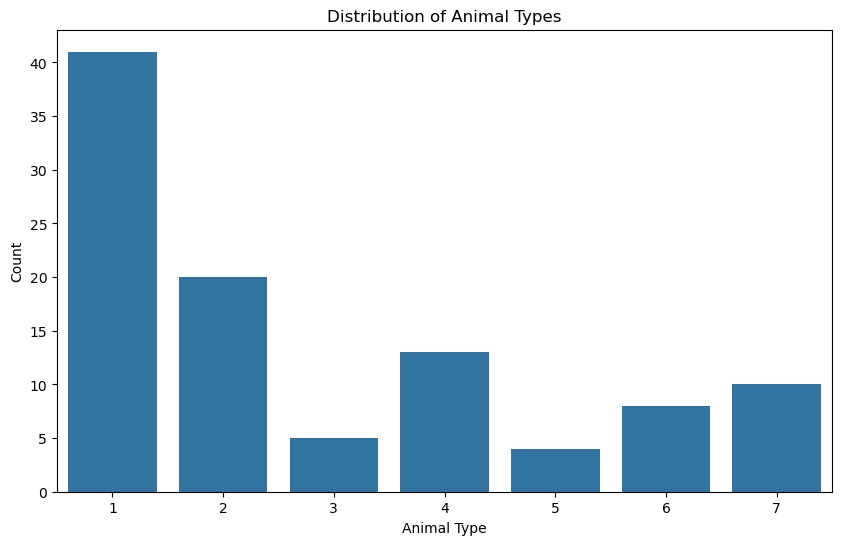

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'type' is treated as categorical and plot the distribution
data['type'] = data['type'].astype('category')

# Plot the corrected distribution of animal types
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# 1.2: Visualize the Distribution of the Hair Feature

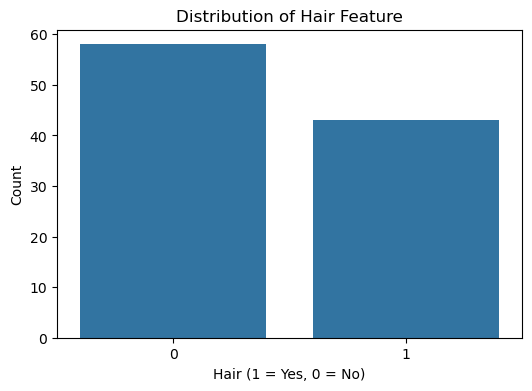

In [4]:
# Ensure 'hair' is treated as categorical and plot the distribution
data['hair'] = data['hair'].astype('category')

# Plot the corrected distribution of hair feature
plt.figure(figsize=(6,4))
sns.countplot(x='hair', data=data)
plt.title('Distribution of Hair Feature')
plt.xlabel('Hair (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# 1.3 Visualize the Distribution of the Feathers Feature

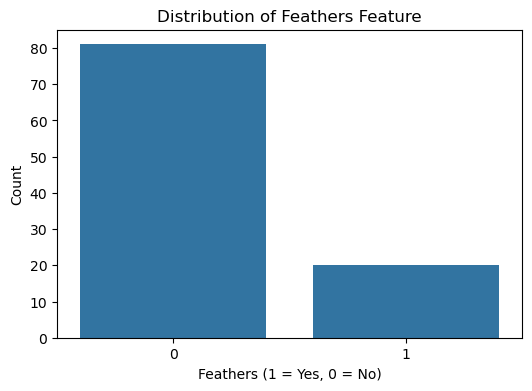

In [5]:
# Ensure 'feathers' is treated as categorical and plot the distribution
data['feathers'] = data['feathers'].astype('category')

# Plot the corrected distribution of feathers feature
plt.figure(figsize=(6,4))
sns.countplot(x='feathers', data=data)
plt.title('Distribution of Feathers Feature')
plt.xlabel('Feathers (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# 1.4 Visualize the Distribution of the Legs Feature

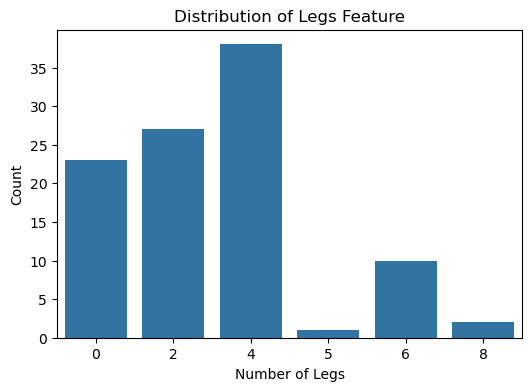

In [6]:
# Plot the distribution of 'legs' (already numerical, no need to convert)
plt.figure(figsize=(6,4))
sns.countplot(x='legs', data=data)
plt.title('Distribution of Legs Feature')
plt.xlabel('Number of Legs')
plt.ylabel('Count')
plt.show()

# 2. Data Preprocessing

# 2.1 Check for Missing Values

In [7]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


# 2.2 Handle Missing Values

In [8]:
# Handle missing values for numeric columns using median
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Handle missing values for categorical columns using mode
categorical_columns = data.select_dtypes(include=['category', 'object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Check if missing values are handled
print("Missing values after handling:\n", data.isnull().sum())

Missing values after handling:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


# 2.3 Detect and Handle Outliers

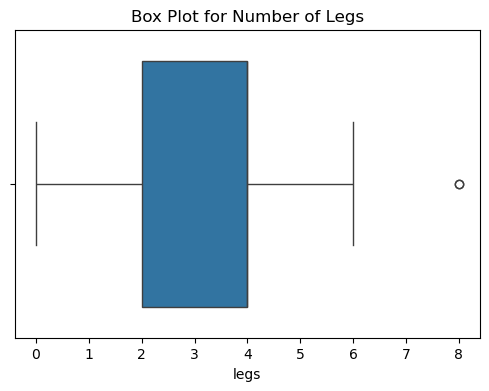

In [9]:
# Visualize outliers using a box plot for the 'legs' feature

plt.figure(figsize=(6,4))
sns.boxplot(x=data['legs'])
plt.title('Box Plot for Number of Legs')
plt.show()

# 2.4 Handle Outliers

In [10]:
# Display 'legs' before capping
print("Legs feature before capping outliers:\n", data['legs'].describe())

# Interquartile Range (IQR) method
Q1 = data['legs'].quantile(0.25)
Q3 = data['legs'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap outliers
data['legs'] = data['legs'].clip(lower=lower_limit, upper=upper_limit)

# Display 'legs' after capping
print("\nLegs feature after capping outliers:\n", data['legs'].describe())

Legs feature before capping outliers:
 count    101.000000
mean       2.841584
std        2.033385
min        0.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: legs, dtype: float64

Legs feature after capping outliers:
 count    101.000000
mean       2.821782
std        1.986938
min        0.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        7.000000
Name: legs, dtype: float64


# 3. Split the Dataset into Training and Testing Sets

In [11]:
# Import Libraries
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop(columns=['animal name', 'type'])  # Drop animal name and target columns
y = data['type']  # Target column

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (80, 16)
Testing set shape: (21, 16)


# 4. Implement KNN on the Training Dataset

# 4.1 KNN with K=3 and Euclidean Distance

In [12]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assume data is already preprocessed and split into X (features) and y (target)
# Features (X) and target (y)
X = data.drop(columns=['animal name', 'type'])  # Drop animal name and target columns
y = data['type']  # Target column

# Step 1: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train the KNN classifier with K=3 (Euclidean distance)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = knn.predict(X_test)

# Step 4: Evaluate the performance of the classifier with K=3
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the evaluation results for K=3
print(f"Results with K=3 (Euclidean distance):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Results with K=3 (Euclidean distance):
Accuracy: 0.9523809523809523
Precision: 0.9682539682539681
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333


# 4.2 KNN with K=5 and Manhattan Distance

In [13]:
# Initialize and train the KNN classifier with K=5 (Manhattan distance)
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance of the classifier with K=5
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the evaluation results for K=5
print(f"\nResults with K=5 (Manhattan distance):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Results with K=5 (Manhattan distance):
Accuracy: 0.9523809523809523
Precision: 0.9682539682539681
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333


# 5. Distance Metrics & Value for K

In [14]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the list of K values and distance metrics to try
k_values = [3, 5, 7, 9]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Loop over K values and distance metrics
for metric in distance_metrics:
    for k in k_values:
        # Initialize the KNN classifier with the current K and distance metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Train the model
        knn.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = knn.predict(X_test)
        
        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
        
        # Print the results for the current K and metric
        print(f"Results for K={k} and metric={metric}:")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print("-" * 40)

Results for K=3 and metric=euclidean:
Accuracy: 0.9523809523809523
Precision: 0.9682539682539681
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333
----------------------------------------
Results for K=5 and metric=euclidean:
Accuracy: 0.9047619047619048
Precision: 0.9523809523809523
Recall: 0.9047619047619048
F1 Score: 0.8957902001380263
----------------------------------------
Results for K=7 and metric=euclidean:
Accuracy: 0.8571428571428571
Precision: 0.9428571428571428
Recall: 0.8571428571428571
F1 Score: 0.8391008577343981
----------------------------------------
Results for K=9 and metric=euclidean:
Accuracy: 0.8571428571428571
Precision: 0.9428571428571428
Recall: 0.8571428571428571
F1 Score: 0.8391008577343981
----------------------------------------
Results for K=3 and metric=manhattan:
Accuracy: 0.9523809523809523
Precision: 0.9682539682539681
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333
----------------------------------------
Results for K=5 and metric=man

# 6. Evaluate the Classifier’s Performance on the Testing Set

In [15]:
# Re-evaluate the performance for K=3 and Euclidean distance

# Initialize the KNN classifier with K=3 and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the final evaluation results
print(f"Final Evaluation Results for K=3 (Euclidean distance):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Final Evaluation Results for K=3 (Euclidean distance):
Accuracy: 0.9523809523809523
Precision: 0.9682539682539681
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333


# 7. Visualizing Decision Boundaries of the Classifier

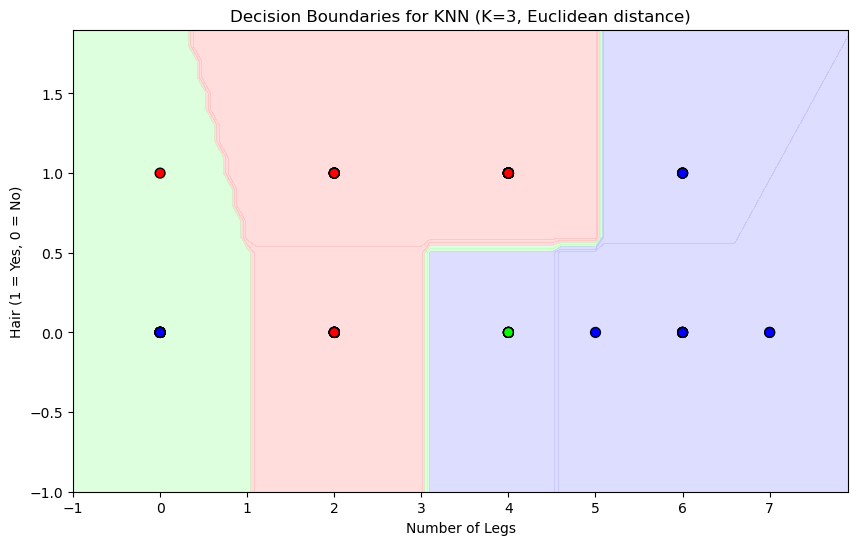

In [16]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Select two features for visualization (e.g., 'legs' and 'hair') and convert 'hair' to numeric
X_vis = data[['legs', 'hair']].copy()  # Select 'legs' and 'hair' as features
X_vis['hair'] = X_vis['hair'].astype(int)  # Convert 'hair' to numeric for plotting
y_vis = data['type']  # Target variable

# Train KNN on the selected two features without using feature names
knn_vis = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # Using K=3 with Euclidean distance
knn_vis.fit(X_vis.values, y_vis.values)  # Pass raw NumPy arrays instead of DataFrames

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_vis['legs'].min() - 1, X_vis['legs'].max() + 1
y_min, y_max = X_vis['hair'].min() - 1, X_vis['hair'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid without using feature names
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Scatter plot of the actual data points
plt.scatter(X_vis['legs'], X_vis['hair'], c=y_vis, s=50, cmap=ListedColormap(cmap_bold), edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Boundaries for KNN (K=3, Euclidean distance)')
plt.xlabel('Number of Legs')
plt.ylabel('Hair (1 = Yes, 0 = No)')
plt.show()

<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>